# Question 2: Peak times for crime occurrances

This notebook aims to answer the second question of the project.

In each year: What are the peak times for crime occurences? Does it change according to season? Is there a concentration of crime around a specific period of the year?

In [1]:
# Dependencies

from pathlib import Path 
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt


In [2]:
# Read in data
df = pd.read_csv(Path('resources', 'mci_no_duplicates_2018_20_22.csv'))

# Keep only the relevant columns
df = df[['OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR', 'MCI_CATEGORY', 'OFFENCE']]

# Make month an ordered categorical variable
df['OCC_MONTH'] = (df['OCC_MONTH']
    .astype(
        CategoricalDtype(
            categories=[
                'January',
                'February',
                'March',
                'April',
                'May',
                'June',
                'July',
                'August',
                'September',
                'October',
                'November',
                'December'
            ],
            ordered=True))
)

# Make day of the week an ordered categorical variable
df['OCC_DOW'] = (df['OCC_DOW']
    .str.strip()
    .astype(
        CategoricalDtype(
            categories=[
                'Monday',
                'Tuesday',
                'Wednesday',
                'Thursday',
                'Friday',
                'Saturday',
                'Sunday'
            ],
            ordered=True)
    )
)

df.head()

,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,MCI_CATEGORY,OFFENCE
0,2018-01-01,2018.0,January,1.0,1.0,Monday,4.0,Assault,Assault
1,2018-01-01,2018.0,January,1.0,1.0,Monday,18.0,Assault,Assault
2,2018-01-01,2018.0,January,1.0,1.0,Monday,2.0,Assault,Assault With Weapon
3,2018-01-01,2018.0,January,1.0,1.0,Monday,NaN,Theft Over,Theft Over
4,2018-01-01,2018.0,January,1.0,1.0,Monday,20.0,Robbery,Robbery - Business


## By year

In [3]:

year_count = (df
    .groupby('OCC_YEAR', as_index=False)
    .size()
)
year_count

,OCC_YEAR,size
0,2018.0,34772
1,2020.0,32456
2,2022.0,37226


In [4]:
year_category_count = (df
    .groupby(['OCC_YEAR', 'MCI_CATEGORY'], as_index=False)
    .size()
    .pivot(columns='OCC_YEAR', values='size', index='MCI_CATEGORY')
)
year_category_count

OCC_YEAR,2018.0,2020.0,2022.0
MCI_CATEGORY,,,
Assault,18256,16703,18742
Auto Theft,4315,5155,8705
Break and Enter,7645,6953,5975
Robbery,3270,2435,2429
Theft Over,1286,1210,1375


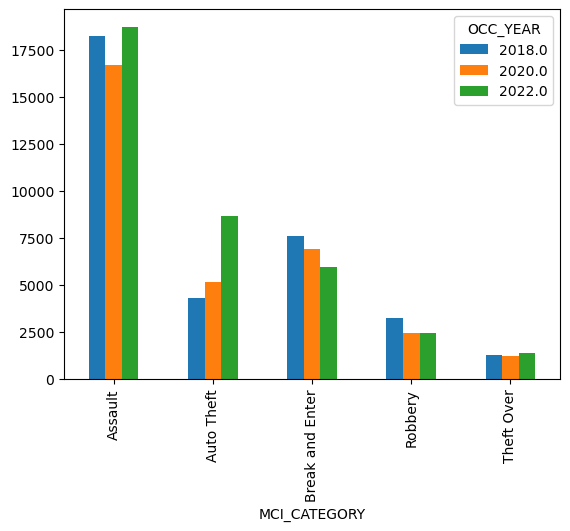

In [5]:
# Visualize
year_category_count.plot(
    kind='bar',
    stacked=False
)
plt.show()

In [6]:
year_offence_count = (df
    .groupby(['OCC_YEAR', 'MCI_CATEGORY', 'OFFENCE'], as_index=False)
    .size()
    .pivot(columns='OCC_YEAR', values='size', index=['MCI_CATEGORY', 'OFFENCE'])
)
year_offence_count

OCC_YEAR                                         2018.0   2020.0   2022.0
MCI_CATEGORY    OFFENCE                                                  
Assault         Administering Noxious Thing        49.0     52.0     72.0
                Aggravated Aslt Peace Officer       1.0      2.0      3.0
                Aggravated Assault                266.0    205.0    217.0
                Aggravated Assault Avails Pros      2.0      NaN      NaN
                Air Gun Or Pistol: Bodily Harm      2.0      NaN      2.0
                Assault                         12703.0  11566.0  13086.0
                Assault - Force/Thrt/Impede        34.0     33.0     41.0
                Assault - Resist/ Prevent Seiz    348.0    204.0    175.0
                Assault Bodily Harm               826.0    686.0    751.0
                Assault Peace Officer             579.0    449.0    509.0
                Assault Peace Officer Wpn/Cbh      51.0     55.0     86.0
                Assault With Weapon              2855.0   2858.0   3314.0
                Crim Negligence Bodily Harm        10.0      8.0      5.0
                Disarming Peace/Public Officer     16.0     16.0     15.0
                Discharge Firearm - Recklessly    155.0    188.0    177.0
                Discharge Firearm With Intent     202.0    224.0    151.0
                Hoax Terrorism Causing Bodily       NaN      NaN      1.0
                Pointing A Firearm                136.0    135.0    119.0
                Unlawfully Causing Bodily Harm      4.0      NaN      NaN
                Use Firearm / Immit Commit Off     17.0     22.0     18.0
Auto Theft      Theft Of Motor Vehicle           4315.0   5155.0   8705.0
Break and Enter B&E                              6392.0   6103.0   5047.0
                B&E - M/Veh To Steal Firearm        4.0      2.0      NaN
                B&E - To Steal Firearm              2.0      2.0      1.0
                B&E Out                            16.0     12.0      6.0
                B&E W'Intent                     1006.0    631.0    699.0
                Unlawfully In Dwelling-House      225.0    203.0    222.0
Robbery         Robbery - Armoured Car              4.0      5.0      1.0
                Robbery - Atm                      17.0      9.0      7.0
                Robbery - Business                552.0    535.0    532.0
                Robbery - Delivery Person          44.0     38.0     15.0
                Robbery - Financial Institute     130.0     75.0     78.0
                Robbery - Home Invasion            84.0     77.0     65.0
                Robbery - Mugging                 925.0    533.0    445.0
                Robbery - Other                   501.0    438.0    448.0
                Robbery - Purse Snatch            134.0     61.0     61.0
                Robbery - Swarming                242.0    101.0     78.0
                Robbery - Taxi                     45.0     16.0      3.0
                Robbery - Vehicle Jacking          67.0    144.0    235.0
                Robbery To Steal Firearm            NaN      NaN      1.0
                Robbery With Weapon               525.0    403.0    460.0
Theft Over      Theft - Misapprop Funds Over        2.0      2.0      2.0
                Theft From Mail / Bag / Key       129.0    248.0    177.0
                Theft From Motor Vehicle Over     292.0    310.0    358.0
                Theft Of Utilities Over             NaN      NaN      1.0
                Theft Over                        726.0    589.0    740.0
                Theft Over - Bicycle               13.0     22.0     18.0
                Theft Over - Distraction           33.0      7.0     13.0
                Theft Over - Shoplifting           91.0     32.0     66.0

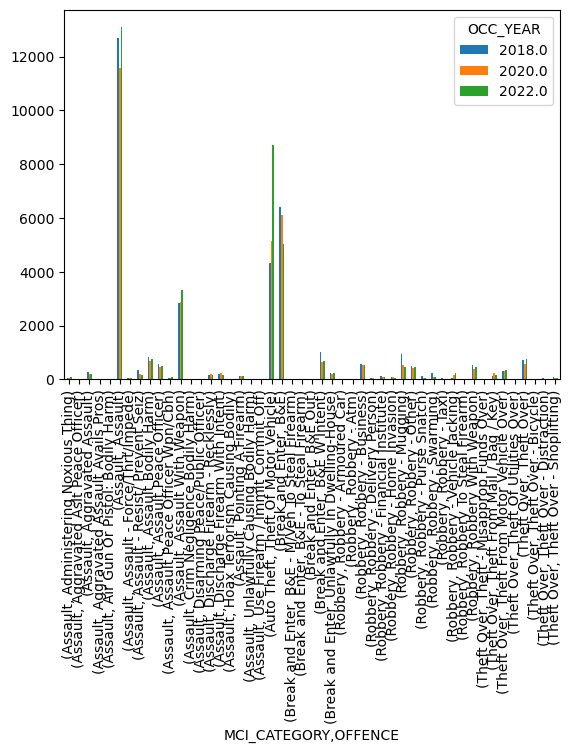

In [7]:
# Visualize
year_offence_count.plot(
    kind='bar',
    stacked=False
)
plt.show()

## By month

In [8]:
df_by_month = (df
    .groupby('OCC_MONTH', as_index=False)
    .size()
)
df_by_month

,OCC_MONTH,size
0,January,8429
1,February,7844
2,March,8912
3,April,7979
4,May,8730
5,June,8716
6,July,9116
7,August,9191
8,September,8978
9,October,9182


## By Day of the Week

In [9]:
df_by_dow = (df
    .groupby('OCC_DOW', as_index=False)
    .size()
)
df_by_dow

,OCC_DOW,size
0,Monday,14727
1,Tuesday,14607
2,Wednesday,15101
3,Thursday,15017
4,Friday,15499
5,Saturday,15143
6,Sunday,14360
